# **Assignment 13** - CIFAR-10
Register Id: SIRSS1021

Name: Manikandan V

College: St. Joseph's Institute of Management


In [24]:
from keras.datasets import cifar10

import matplotlib.pyplot as plt
from keras import models,layers
from tensorflow.keras.utils import to_categorical
from keras import optimizers

In [25]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [26]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [27]:
x_train = x_train/255   
x_test = x_test/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

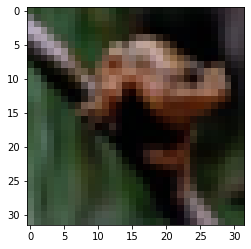

In [28]:
plt.imshow(x_train[5000])
plt.show()

In [29]:
print(x_train[100])

[[[0.8352941  0.8980392  0.9490196 ]
  [0.827451   0.8901961  0.9411765 ]
  [0.827451   0.8901961  0.9411765 ]
  ...
  [0.5921569  0.68235296 0.80784315]
  [0.5921569  0.68235296 0.80784315]
  [0.58431375 0.6745098  0.8       ]]

 [[0.8392157  0.8980392  0.94509804]
  [0.83137256 0.8901961  0.9372549 ]
  [0.83137256 0.8901961  0.9372549 ]
  ...
  [0.59607846 0.6862745  0.8117647 ]
  [0.59607846 0.6862745  0.8117647 ]
  [0.5921569  0.68235296 0.8039216 ]]

 [[0.84705883 0.8980392  0.9372549 ]
  [0.8392157  0.8901961  0.92941177]
  [0.8352941  0.8901961  0.92941177]
  ...
  [0.6        0.6901961  0.80784315]
  [0.6        0.6901961  0.80784315]
  [0.5921569  0.68235296 0.8       ]]

 ...

 [[0.5686275  0.62352943 0.64705884]
  [0.53333336 0.5803922  0.6039216 ]
  [0.56078434 0.59607846 0.61960787]
  ...
  [0.84705883 0.8509804  0.80784315]
  [0.76862746 0.77254903 0.7490196 ]
  [0.7176471  0.7176471  0.7137255 ]]

 [[0.54509807 0.6        0.62352943]
  [0.5058824  0.5568628  0.5803922 ]


Model Building

In [30]:
model = models.Sequential()


In [31]:
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2)) 
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(layers.Conv2D(128,(3,3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2)) 
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(layers.Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2)) 
model.add(layers.Dropout(0.2))

In [32]:
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10,activation='softmax'))

In [33]:
opt = optimizers.Adam(learning_rate=1e-4, decay=1e-6)

In [34]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)        

In [36]:
# Fitting the model
result=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=25,batch_size=64)

Epoch 1/25
782/782 [==============================] - 10s 11ms/step - loss: 2.0881 - accuracy: 0.2095 - val_loss: 1.6244 - val_accuracy: 0.4071
Epoch 2/25
782/782 [==============================] - 7s 9ms/step - loss: 1.6402 - accuracy: 0.3985 - val_loss: 1.4258 - val_accuracy: 0.4841
Epoch 3/25
782/782 [==============================] - 7s 9ms/step - loss: 1.4831 - accuracy: 0.4644 - val_loss: 1.2715 - val_accuracy: 0.5434
Epoch 4/25
782/782 [==============================] - 7s 9ms/step - loss: 1.3555 - accuracy: 0.5109 - val_loss: 1.2233 - val_accuracy: 0.5608
Epoch 5/25
782/782 [==============================] - 7s 9ms/step - loss: 1.2553 - accuracy: 0.5535 - val_loss: 1.1250 - val_accuracy: 0.6029
Epoch 6/25
782/782 [==============================] - 7s 9ms/step - loss: 1.1881 - accuracy: 0.5787 - val_loss: 1.0655 - val_accuracy: 0.6188
Epoch 7/25
782/782 [==============================] - 7s 9ms/step - loss: 1.1365 - accuracy: 0.6035 - val_loss: 1.0082 - val_accuracy: 0.6462
Epoc

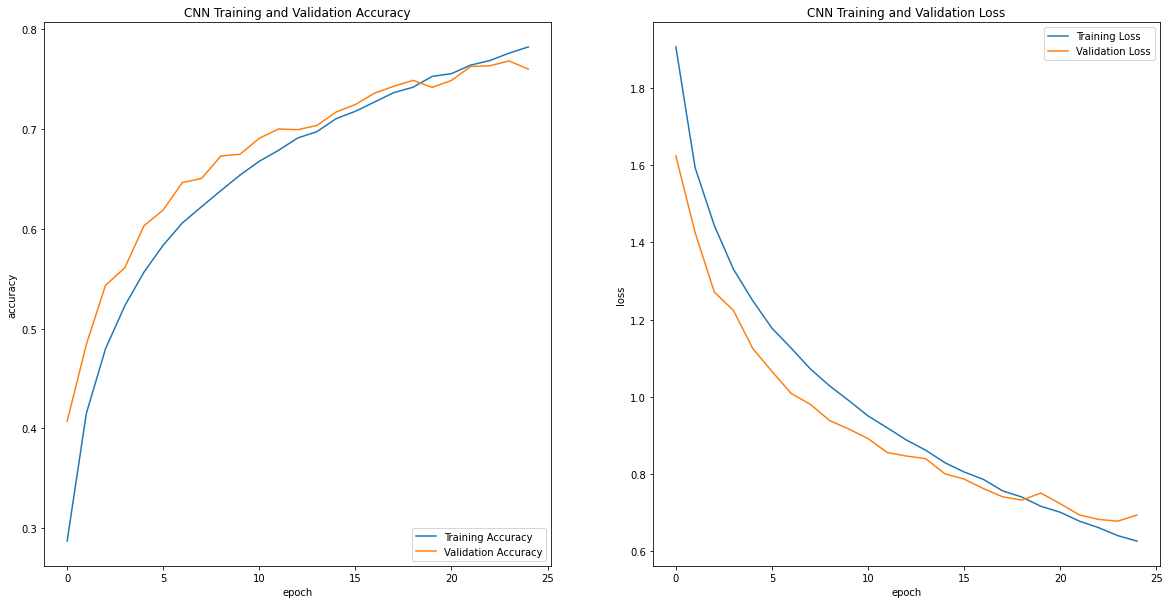

In [37]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("CNN Training and Validation Accuracy")
plt.plot(result.history["accuracy"], label='Training Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1, 2, 2)
plt.plot( result.history["loss"], label='Training Loss')
plt.plot( result.history["val_loss"], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [38]:
scores = model.evaluate(x_test, y_test, verbose=1) 
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.6927 - accuracy: 0.7598
Test loss: 0.6926968097686768
Test accuracy: 0.7598000168800354
